<a href="https://colab.research.google.com/github/samanehPahlavani/MscFraudDetection/blob/main/LastEtereumModelsC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive For Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Libraries











In [ ]:
####Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

%matplotlib inline
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVR

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install pandas_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
# Import the necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split, KFold

In [ ]:
import time

# Functions Def

In [ ]:
def LoadData(data):
  warnings.filterwarnings('ignore')
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  df = pd.read_csv(os.path.join("/content/drive/MyDrive/EtherFirstDataSet/", data+".csv"))
  return df
#Load datas
def preprocessing():

  df1 = LoadData(str(1))
  df2 = LoadData(str(2))

  df1_fillna = df1.copy()
  df2_fillna = df2.copy()

  #Drop Most None Related Value Features
  df1_fillna.drop(["ERC20_uniq_rec_token_name","ERC20_uniq_sent_token_name","ERC20_avg_val_sent","ERC20_max_val_sent","ERC20_min_val_sent","ERC20_avg_val_rec","ERC20_max_val_rec","ERC20_min_val_rec","ERC20_uniq_rec_contract_addr","ERC20_uniq_sent_addr_1","ERC20_uniq_sent_addr","ERC20_total_Ether_sent_contract","ERC20_total_ether_sent","ERC20_total_Ether_received","ERC20_most_rec_token_type","ERC20_most_sent_token_type"], axis=1, inplace=True)
  df1_fillna.drop(["ERC20_uniq_rec_addr","Total_ERC20_tnxs","Time_Diff_between_first_and_last_Mins","total_ether_sent_contracts"], axis=1, inplace=True)
  df2_fillna.drop(["minTimeBetweenSentTnx","maxTimeBetweenSentTnx","minTimeBetweenRecTnx","maxTimeBetweenRecTnx","lifetime","activityDays","dailyMax","ratioRecSent","ratioSentTotal","ratioRecTotal","giniSent","giniRec","txFreq","stdBalanceEth"], axis=1, inplace=True)

  #Rename Columns
  selected_columns = ["address","flag","avgTimeBetweenRecTnx","avgTimeBetweenSentTnx","sentTransactions" ,"receivedTransactions", "createdContracts" ,"Average_of_numUniqRecAddress" ,"Average_of_numUniqSentAddress"
  ,"minValReceived"
  ,"maxValReceived"
  ,"avgValReceived"
  , "minValSent"
  , "maxValSent"
  ,"avgValSent"
  ,"totalTransactions"
  ,"totalEtherSent"
  ,"totalEtherReceived"
  ,"totalEtherBalance"    ]

  df2_fillna = df2[selected_columns].copy()

  df2_fillna.columns = ["Address"
  ,"FLAG"
  ,"Avg_min_between_received_tnx"
  ,"Avg_min_between_sent_tnx"
  ,"Sent_tnx"
  ,"Received_Tnx"
  ,"Number_of_Created_Contracts"
  ,"Average_of_Unique_Received_From_Addresses"
  ,"Average_of_Unique_Sent_To_Addresses"
  ,"min_value_received"
  ,"max_value_received "
  ,"avg_val_received"
  ,"min_val_sent"
  ,"max_val_sent"
  ,"avg_val_sent"
  ,"total_transactions_including_tnx_to_create_contract"
  ,"total_Ether_sent"
  ,"total_ether_received"
  ,"total_ether_balance"
  ]

  merged_df = pd.merge(df1_fillna, df2_fillna, how='outer')
  df_filtered = merged_df.drop_duplicates(subset='Address', keep='first')
  return df_filtered



In [ ]:
def scaled(data):
  # Convert categorical 'FLAG' to numeric
  label_encoder = LabelEncoder()
  data['FLAG'] = label_encoder.fit_transform(data['FLAG'])

  # Splitting the data into features (X) and labels (y)
  X =  data.drop(['FLAG'], axis=1)
  y = data['FLAG']

  # Standardize features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  #X_scaled['FLAG'] = y


  return X_scaled,y

In [ ]:
def undersampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply undersampling
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = undersampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled, unselected_data

In [ ]:
def oversampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply oversampling
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = oversampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)

    return resampled, unselected_data

In [ ]:
def smote(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled data into a DataFrame
    resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_column)], axis=1)
    return resampled_data,''

In [ ]:
def ballanced(data,type="O"):

  if type=="U":
    resampled, unselected_data = undersampling(data, 'FLAG')
  elif type=="S":
    resampled, unselected_data  = smote(data, 'FLAG')
  elif type=="O":
    resampled, unselected_data = oversampling(data, 'FLAG')


  return resampled, unselected_data


#**Preprocessing **

In [ ]:
df_filtered = preprocessing()
df_filtered = df_filtered.drop(['Address'], axis=1)

**Imballanced Dataset**

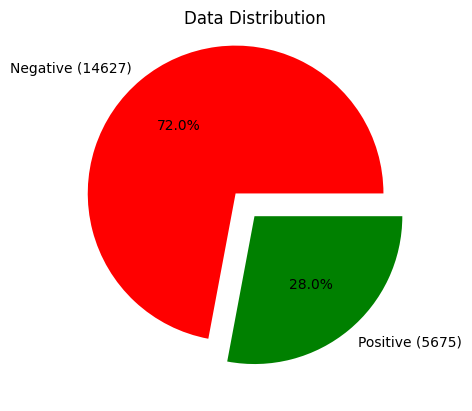

In [ ]:
df = df_filtered
positive_sample = df[(df["FLAG"]==1)]
negative_sample = df[(df["FLAG"]==0)]
dist = df["FLAG"].value_counts()

_ = plt.pie(dist, labels = ["Negative ({0})".format(len(negative_sample)), "Positive ({0})".format(len(positive_sample))], colors = ["r", "g"], explode=[0.2, 0], autopct='%1.1f%%')
_ = plt.title("Data Distribution")

In [ ]:
#df_filtered = np.array(df_filtered)
df_filtered.shape

(20302, 18)

In [ ]:
resampledOver, unselected_Over = ballanced(df_filtered,"O")
resampledOver.shape

(29254, 18)

In [ ]:
X_reshapedO,y_reshapedO = scaled(resampledOver)
X_reshapedO.shape

(29254, 17)

In [ ]:
X_trainO, X_testO, y_trainO, y_testO =  train_test_split(X_reshapedO, y_reshapedO, test_size=0.1, random_state=42)

In [76]:
X_testO.shape

(2926,)

In [77]:
X_trainO.shape

(26328, 17)

# #**Models**

Rescaling

1-LogisticRegression(LR)

2-SVM (Support Vector Machine)

3-RandomForest(RF)

4-DT

5-XGBOOST

6-MLP

7-Naive Bayes

8-KNN

9- Extra Trees





In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


# **1-LogisticRegression(LR)**

In [ ]:
LR = LogisticRegression()
# Dictionary to store confusion matrices, accuracies, and cross-validation scores
resultsLR = {}

# Loop over the training/testing sets
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [ ]:
fld = 1
for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        LR.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predictLR = LR.predict(X_testV)
        Inference_Time = time.time() - start_time


        y_predictLR = LR.predict(X_testV)
        accuracy = accuracy_score(y_testV, y_predictLR)
        precision = precision_score(y_testV, y_predictLR)
        recall = recall_score(y_testV, y_predictLR)
        f1= f1_score(y_testV, y_predictLR)
        kappa = cohen_kappa_score(y_testV, y_predictLR)

        roc_auc = roc_auc_score(y_testV, y_predictLR)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictLR)
        conf_mat = confusion_matrix(y_testV, y_predictLR)
        resultsLR[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision,
                                  'recall': recall, 'f1': f1, 'kappa': kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}



        # Print metrics for the LR model
        print(f'Metrics for LR Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")
        fld = fld + 1


Metrics for LR Model Fold 1:
Inference Time: 0.0095 seconds
training Time: 0.6557 seconds
Accuracy: 0.65
Precision: 0.60
Recall: 0.94
F1-score: 0.73
kappa: 0.30
ROC AUC: 0.65
fpr: [0.         0.63768116 1.        ]
tpr: [0.         0.93568043 1.        ]
thresholds: [2 1 0]
[[ 525  924]
 [  95 1382]]
********************************************************************
Metrics for LR Model Fold 2:
Inference Time: 0.0052 seconds
training Time: 0.6522 seconds
Accuracy: 0.67
Precision: 0.61
Recall: 0.94
F1-score: 0.74
kappa: 0.35
ROC AUC: 0.68
fpr: [0.         0.58333333 1.        ]
tpr: [0.         0.93586207 1.        ]
thresholds: [2 1 0]
[[ 615  861]
 [  93 1357]]
********************************************************************
Metrics for LR Model Fold 3:
Inference Time: 0.0045 seconds
training Time: 0.6263 seconds
Accuracy: 0.69
Precision: 0.63
Recall: 0.95
F1-score: 0.76
kappa: 0.37
ROC AUC: 0.68
fpr: [0.         0.58524704 1.        ]
tpr: [0.         0.95231699 1.        ]
thr

In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsLR.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.69
Worst Accuracy: 0.65
Average Accuracy: 0.67
************************************************
Best Precision: 0.63
Worst Precision: 0.59
Average Precision: 0.608
************************************************
Best Recall: 0.96
Worst Recall: 0.92
Average Recall: 0.94
************************************************
Best F1 Score: 0.76
Worst F1 Score: 0.73
Average F1 Score: 0.74
************************************************
Best Kappa: 0.37
Worst Kappa: 0.3
Average Kappa: 0.33
************************************************
Best Inference_Time: 0.00946
Worst Inference_Time: 0.00225
Average Inference_Time: 0.00392
************************************************
Best Training_time: 0.77885
Worst Training_time: 0.30834
Average Training_time: 0.46411
************************************************
Best roc_auc: 0.68
Worst roc_auc: 0.65
Average roc_auc: 0.67


# 2-SVM (Support Vector Machine)

In [ ]:
SVM = SVC(kernel='linear', random_state=42)

In [ ]:
resultsSVM = {}

kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        SVM.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predictSVM = SVM.predict(X_testV)
        Inference_Time = time.time() - start_time

        accuracy = accuracy_score(y_testV, y_predictSVM)
        precision = precision_score(y_testV, y_predictSVM)
        recall = recall_score(y_testV, y_predictSVM)
        f1= f1_score(y_testV, y_predictSVM)
        kappa = cohen_kappa_score(y_testV, y_predictSVM)
        roc_auc = roc_auc_score(y_testV, y_predictSVM)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictSVM)
        conf_mat = confusion_matrix(y_testV, y_predictSVM)
        resultsSVM[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision,
                                  'recall': recall, 'f1': f1, 'kappa': kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}


        # Print metrics for the SVM model
        print(f'Metrics for SVM Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")
        fld = fld + 1


Metrics for SVM Model Fold 1:
Inference Time: 1.4238 seconds
training Time: 41.1783 seconds
Accuracy: 0.63
Precision: 0.58
Recall: 0.96
F1-score: 0.73
kappa: 0.26
ROC AUC: 0.63
fpr: [0.         0.70117322 1.        ]
tpr: [0.        0.9634394 1.       ]
thresholds: [2 1 0]
[[ 433 1016]
 [  54 1423]]
********************************************************************
Metrics for SVM Model Fold 2:
Inference Time: 1.4339 seconds
training Time: 40.4709 seconds
Accuracy: 0.64
Precision: 0.59
Recall: 0.96
F1-score: 0.73
kappa: 0.29
ROC AUC: 0.65
fpr: [0.         0.66666667 1.        ]
tpr: [0.         0.96206897 1.        ]
thresholds: [2 1 0]
[[ 492  984]
 [  55 1395]]
********************************************************************
Metrics for SVM Model Fold 3:
Inference Time: 2.7054 seconds
training Time: 47.3386 seconds
Accuracy: 0.66
Precision: 0.60
Recall: 0.97
F1-score: 0.74
kappa: 0.31
ROC AUC: 0.65
fpr: [0.         0.66388309 1.        ]
tpr: [0.         0.96843519 1.        ]


In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsSVM.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.66
Worst Accuracy: 0.63
Average Accuracy: 0.64
************************************************
Best Precision: 0.61
Worst Precision: 0.57
Average Precision: 0.587
************************************************
Best Recall: 0.98
Worst Recall: 0.95
Average Recall: 0.96
************************************************
Best F1 Score: 0.75
Worst F1 Score: 0.72
Average F1 Score: 0.73
************************************************
Best Kappa: 0.31
Worst Kappa: 0.26
Average Kappa: 0.28
************************************************
Best Inference_Time: 2.70536
Worst Inference_Time: 1.40792
Average Inference_Time: 1.54944
************************************************
Best Training_time: 47.33864
Worst Training_time: 38.14033
Average Training_time: 41.79381
************************************************
Best roc_auc: 0.65
Worst roc_auc: 0.63
Average roc_auc: 0.64


# **3-RF(RandomForest)**

In [ ]:

RF = RandomForestClassifier(random_state=42)


In [ ]:
resultsRF = {}

kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        RF.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predictRF = RF.predict(X_testV)
        Inference_time = time.time() - start_time

        accuracy = accuracy_score(y_testV, y_predictRF)
        precision = precision_score(y_testV, y_predictRF)
        recall = recall_score(y_testV, y_predictRF)
        f1= f1_score(y_testV, y_predictRF)
        kappa = cohen_kappa_score(y_testV, y_predictRF)
        roc_auc = roc_auc_score(y_testV, y_predictRF)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictRF)

        conf_mat = confusion_matrix(y_testV, y_predictRF)
        resultsRF[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1,'kappa':kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_time,'Training_time':Training_time}

        print(f'Metrics for RF Model Fold {fld}:')
        print(f"Inference Time: {Inference_time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")
        fld = fld + 1


Metrics for RF Model Fold 1:
Inference Time: 0.0898 seconds
training Time: 12.6284 seconds
Accuracy: 0.95
Precision: 0.93
Recall: 0.98
F1-score: 0.96
kappa: 0.91
ROC AUC: 0.95
fpr: [0.        0.0731539 1.       ]
tpr: [0.        0.9817197 1.       ]
thresholds: [2 1 0]
[[1343  106]
 [  27 1450]]
********************************************************************
Metrics for RF Model Fold 2:
Inference Time: 0.0666 seconds
training Time: 7.0127 seconds
Accuracy: 0.96
Precision: 0.93
Recall: 0.98
F1-score: 0.96
kappa: 0.92
ROC AUC: 0.96
fpr: [0.         0.06842818 1.        ]
tpr: [0.         0.98413793 1.        ]
thresholds: [2 1 0]
[[1375  101]
 [  23 1427]]
********************************************************************
Metrics for RF Model Fold 3:
Inference Time: 0.0771 seconds
training Time: 7.4616 seconds
Accuracy: 0.96
Precision: 0.94
Recall: 0.97
F1-score: 0.96
kappa: 0.92
ROC AUC: 0.96
fpr: [0.         0.05915101 1.        ]
tpr: [0.         0.97447952 1.        ]
threshol

In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsRF.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.97
Worst Accuracy: 0.95
Average Accuracy: 0.96
************************************************
Best Precision: 0.95
Worst Precision: 0.93
Average Precision: 0.94
************************************************
Best Recall: 0.99
Worst Recall: 0.97
Average Recall: 0.98
************************************************
Best F1 Score: 0.97
Worst F1 Score: 0.96
Average F1 Score: 0.96
************************************************
Best Kappa: 0.93
Worst Kappa: 0.91
Average Kappa: 0.92
************************************************
Best Inference_Time: 0.08977
Worst Inference_Time: 0.06526
Average Inference_Time: 0.07251
************************************************
Best Training_time: 12.62842
Worst Training_time: 6.57416
Average Training_time: 7.91576
************************************************
Best roc_auc: 0.96
Worst roc_auc: 0.95
Average roc_auc: 0.96


# **4-DT(Decision Tree)**

In [ ]:
DT = DecisionTreeClassifier(random_state=42)

In [ ]:
resultsDT = {}

kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        DT.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predictDT = DT.predict(X_testV)
        Inference_Time = time.time() - start_time

        accuracy = accuracy_score(y_testV, y_predictDT)
        precision = precision_score(y_testV, y_predictDT)
        recall = recall_score(y_testV, y_predictDT)
        f1= f1_score(y_testV, y_predictDT)
        kappa = cohen_kappa_score(y_testV, y_predictDT)

        roc_auc = roc_auc_score(y_testV, y_predictDT)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictDT)

        conf_mat = confusion_matrix(y_testV, y_predictDT)
        resultsDT[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1,'kappa':kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}



        # Print metrics for the DT model
        print(f'Metrics for DT Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")
        fld = fld + 1

Metrics for DT Model Fold 1:
Inference Time: 0.0029 seconds
training Time: 0.5255 seconds
Accuracy: 0.94
Precision: 0.91
Recall: 0.98
F1-score: 0.94
kappa: 0.88
ROC AUC: 0.94
fpr: [0.         0.09730849 1.        ]
tpr: [0.         0.97630332 1.        ]
thresholds: [2 1 0]
[[1308  141]
 [  35 1442]]
********************************************************************
Metrics for DT Model Fold 2:
Inference Time: 0.0029 seconds
training Time: 0.6108 seconds
Accuracy: 0.94
Precision: 0.91
Recall: 0.98
F1-score: 0.95
kappa: 0.89
ROC AUC: 0.94
fpr: [0.         0.09417344 1.        ]
tpr: [0.         0.98206897 1.        ]
thresholds: [2 1 0]
[[1337  139]
 [  26 1424]]
********************************************************************
Metrics for DT Model Fold 3:
Inference Time: 0.0028 seconds
training Time: 0.5296 seconds
Accuracy: 0.94
Precision: 0.92
Recall: 0.97
F1-score: 0.94
kappa: 0.88
ROC AUC: 0.94
fpr: [0.         0.09255393 1.        ]
tpr: [0.         0.96709201 1.        ]
thr

In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsDT.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.95
Worst Accuracy: 0.94
Average Accuracy: 0.94
************************************************
Best Precision: 0.93
Worst Precision: 0.91
Average Precision: 0.916
************************************************
Best Recall: 0.98
Worst Recall: 0.97
Average Recall: 0.98
************************************************
Best F1 Score: 0.95
Worst F1 Score: 0.94
Average F1 Score: 0.94
************************************************
Best Kappa: 0.9
Worst Kappa: 0.87
Average Kappa: 0.89
************************************************
Best Inference_Time: 0.0029
Worst Inference_Time: 0.00218
Average Inference_Time: 0.00247
************************************************
Best Training_time: 0.61082
Worst Training_time: 0.36828
Average Training_time: 0.44025
************************************************
Best roc_auc: 0.95
Worst roc_auc: 0.94
Average roc_auc: 0.94


# **5-XGBoost**

In [ ]:
XGB = XGBClassifier(random_state=42)

In [ ]:
resultsXGB = {}
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        XGB.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predictXGB = XGB.predict(X_testV)
        Inference_Time = time.time() - start_time

        accuracy = accuracy_score(y_testV, y_predictXGB)
        precision = precision_score(y_testV, y_predictXGB)
        recall = recall_score(y_testV, y_predictXGB)
        f1= f1_score(y_testV, y_predictXGB)
        kappa = cohen_kappa_score(y_testV, y_predictXGB)
        roc_auc = roc_auc_score(y_testV, y_predictXGB)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictXGB)
        conf_mat = confusion_matrix(y_testV, y_predictXGB)
        resultsXGB[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1,'kappa':kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}

        # Print metrics for the XGBOOST model
        print(f'Metrics for XGBOOST Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")
        fld = fld + 1



Metrics for XGBOOST Model Fold 1:
Inference Time: 0.0119 seconds
training Time: 0.6497 seconds
Accuracy: 0.95
Precision: 0.93
Recall: 0.97
F1-score: 0.95
kappa: 0.89
ROC AUC: 0.95
fpr: [0.         0.07384403 1.        ]
tpr: [0.         0.96750169 1.        ]
thresholds: [2 1 0]
[[1342  107]
 [  48 1429]]
********************************************************************
Metrics for XGBOOST Model Fold 2:
Inference Time: 0.0120 seconds
training Time: 0.6650 seconds
Accuracy: 0.96
Precision: 0.95
Recall: 0.97
F1-score: 0.96
kappa: 0.91
ROC AUC: 0.96
fpr: [0.         0.05284553 1.        ]
tpr: [0.         0.96551724 1.        ]
thresholds: [2 1 0]
[[1398   78]
 [  50 1400]]
********************************************************************
Metrics for XGBOOST Model Fold 3:
Inference Time: 0.0167 seconds
training Time: 0.6270 seconds
Accuracy: 0.95
Precision: 0.94
Recall: 0.97
F1-score: 0.96
kappa: 0.91
ROC AUC: 0.95
fpr: [0.         0.05915101 1.        ]
tpr: [0.         0.96709201 

In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsXGB.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 2)
worst_Inference_Time = round(min(Inference_Time), 2)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 2)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 5)
worst_roc_auc = round(min(roc_auc), 5)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 5)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.96
Worst Accuracy: 0.95
Average Accuracy: 0.95
************************************************
Best Precision: 0.95
Worst Precision: 0.93
Average Precision: 0.942
************************************************
Best Recall: 0.98
Worst Recall: 0.96
Average Recall: 0.97
************************************************
Best F1 Score: 0.96
Worst F1 Score: 0.95
Average F1 Score: 0.96
************************************************
Best Kappa: 0.92
Worst Kappa: 0.89
Average Kappa: 0.91
************************************************
Best Inference_Time: 0.05
Worst Inference_Time: 0.01
Average Inference_Time: 0.02
************************************************
Best Training_time: 4.71135
Worst Training_time: 0.56713
Average Training_time: 1.27574
************************************************
Best roc_auc: 0.95802
Worst roc_auc: 0.94683
Average roc_auc: 0.95489


# **6-MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, random_state=42)

In [ ]:
resultsMLP = {}
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        MLP.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predMLP = MLP.predict(X_testV)
        Inference_Time = time.time() - start_time

        accuracy  = accuracy_score(y_testV, y_predMLP)
        precision  = precision_score(y_testV, y_predMLP)
        recall  = recall_score(y_testV, y_predMLP)
        f1  = f1_score(y_testV, y_predMLP)
        roc_auc = roc_auc_score(y_testV, y_predMLP)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predMLP)

        kappa = cohen_kappa_score(y_testV, y_predMLP)
        conf_mat = confusion_matrix(y_testV, y_predMLP)
        resultsMLP[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1,'kappa':kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}

        # Print metrics for the MLP model
        print(f'Metrics for MLP Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")
        fld = fld + 1



Metrics for MLP Model Fold 1:
Inference Time: 0.0048 seconds
training Time: 33.5772 seconds
Accuracy: 0.82
Precision: 0.76
Recall: 0.93
F1-score: 0.84
kappa: 0.63
ROC AUC: 0.82
fpr: [0.         0.29744651 1.        ]
tpr: [0.        0.9309411 1.       ]
thresholds: [2 1 0]
[[1018  431]
 [ 102 1375]]
********************************************************************
Metrics for MLP Model Fold 2:
Inference Time: 0.0043 seconds
training Time: 24.7672 seconds
Accuracy: 0.80
Precision: 0.73
Recall: 0.93
F1-score: 0.82
kappa: 0.60
ROC AUC: 0.80
fpr: [0.         0.32926829 1.        ]
tpr: [0.         0.92689655 1.        ]
thresholds: [2 1 0]
[[ 990  486]
 [ 106 1344]]
********************************************************************
Metrics for MLP Model Fold 3:
Inference Time: 0.0042 seconds
training Time: 17.7241 seconds
Accuracy: 0.81
Precision: 0.75
Recall: 0.95
F1-score: 0.84
kappa: 0.62
ROC AUC: 0.81
fpr: [0.         0.33194154 1.        ]
tpr: [0.        0.9516454 1.       ]
thr

In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsMLP.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.82
Worst Accuracy: 0.79
Average Accuracy: 0.81
************************************************
Best Precision: 0.78
Worst Precision: 0.73
Average Precision: 0.751
************************************************
Best Recall: 0.95
Worst Recall: 0.87
Average Recall: 0.92
************************************************
Best F1 Score: 0.84
Worst F1 Score: 0.81
Average F1 Score: 0.83
************************************************
Best Kappa: 0.64
Worst Kappa: 0.59
Average Kappa: 0.62
************************************************
Best Inference_Time: 0.00924
Worst Inference_Time: 0.00416
Average Inference_Time: 0.00494
************************************************
Best Training_time: 33.57721
Worst Training_time: 17.6497
Average Training_time: 20.62768
************************************************
Best roc_auc: 0.82
Worst roc_auc: 0.8
Average roc_auc: 0.81


# **7-NaiveBayes**

In [ ]:
resultsNaiveBayes = {}
additional_metrics = {}
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
NaiveBayes = GaussianNB()
for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        NaiveBayes.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predNaiveBayes = NaiveBayes.predict(X_testV)
        Inference_Time = time.time() - start_time

        accuracy = accuracy_score(y_testV, y_predNaiveBayes)
        precision = precision_score(y_testV, y_predNaiveBayes)
        recall = recall_score(y_testV, y_predNaiveBayes)
        f1 = f1_score(y_testV, y_predNaiveBayes)

        kappa = cohen_kappa_score(y_testV, y_predNaiveBayes)
        roc_auc = roc_auc_score(y_testV, y_predNaiveBayes)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predNaiveBayes)

        confusion_matrix_ensemble = confusion_matrix(y_testV, y_predNaiveBayes)


        resultsNaiveBayes[f'Model_{fld}'] = {'Matrix': confusion_matrix_ensemble, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1,'kappa':kappa,'roc_auc':roc_auc
                                             ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}



        # Print metrics for the NaiveBayes model
        print(f'Metrics for NaiveBayes Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")
        fld = fld + 1



Metrics for NaiveBayes Model Fold 1:
Inference Time: 0.0086 seconds
training Time: 0.0214 seconds
Accuracy: 0.57
Precision: 0.54
Recall: 0.99
F1-score: 0.70
kappa: 0.13
ROC AUC: 0.57
fpr: [0.         0.85507246 1.        ]
tpr: [0.         0.98849018 1.        ]
thresholds: [2 1 0]
[[1010  470]
 [  80 1365]]
********************************************************************
Metrics for NaiveBayes Model Fold 2:
Inference Time: 0.0034 seconds
training Time: 0.0219 seconds
Accuracy: 0.57
Precision: 0.53
Recall: 0.99
F1-score: 0.69
kappa: 0.14
ROC AUC: 0.57
fpr: [0.         0.84891599 1.        ]
tpr: [0.         0.98758621 1.        ]
thresholds: [2 1 0]
[[1010  470]
 [  80 1365]]
********************************************************************
Metrics for NaiveBayes Model Fold 3:
Inference Time: 0.0033 seconds
training Time: 0.0189 seconds
Accuracy: 0.58
Precision: 0.55
Recall: 0.99
F1-score: 0.71
kappa: 0.15
ROC AUC: 0.57
fpr: [0.         0.84272791 1.        ]
tpr: [0.         0.

In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsNaiveBayes.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.59
Worst Accuracy: 0.55
Average Accuracy: 0.57
************************************************
Best Precision: 0.56
Worst Precision: 0.52
Average Precision: 0.538
************************************************
Best Recall: 0.99
Worst Recall: 0.98
Average Recall: 0.99
************************************************
Best F1 Score: 0.72
Worst F1 Score: 0.68
Average F1 Score: 0.7
************************************************
Best Kappa: 0.16
Worst Kappa: 0.12
Average Kappa: 0.14
************************************************
Best Inference_Time: 0.00856
Worst Inference_Time: 0.00305
Average Inference_Time: 0.00389
************************************************
Best Training_time: 0.04168
Worst Training_time: 0.01851
Average Training_time: 0.02412
************************************************
Best roc_auc: 0.58
Worst roc_auc: 0.56
Average roc_auc: 0.57


# **8-KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [ ]:
resultsKNN = {}
additional_metrics = {}
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        KNN.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predKNN= KNN.predict(X_testV)
        Inference_Time = time.time() - start_time

        accuracy_KNN = accuracy_score(y_testV, y_predKNN)
        precision_KNN = precision_score(y_testV, y_predKNN)
        recall_KNN = recall_score(y_testV, y_predKNN)
        f1_KNN = f1_score(y_testV, y_predKNN)

        kappa = cohen_kappa_score(y_testV, y_predKNN)
        confusion_matrix_KNN = confusion_matrix(y_testV, y_predKNN)
        roc_auc = roc_auc_score(y_testV, y_predKNN)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predKNN)

        resultsKNN[f'Model_{fld}'] = {'Matrix': confusion_matrix_KNN, 'accuracy': accuracy_KNN, 'precision': precision_KNN, 'recall': recall_KNN, 'f1': f1_KNN,'kappa':kappa,'roc_auc':roc_auc
                                      ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}

        # Print metrics for the KNN model
        print(f'Metrics for KNN Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy_KNN:.2f}")
        print(f"Precision: {precision_KNN:.2f}")
        print(f"Recall: {recall_KNN:.2f}")
        print(f"F1-score: {f1_KNN:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(confusion_matrix_KNN)
        print("********************************************************************")
        fld = fld + 1


Metrics for KNN Model Fold 1:
Inference Time: 1.4859 seconds
training Time: 0.0078 seconds
Accuracy: 0.90
Precision: 0.88
Recall: 0.92
F1-score: 0.90
kappa: 0.80
ROC AUC: 0.90
fpr: [0.         0.12491373 1.        ]
tpr: [0.         0.92010833 1.        ]
thresholds: [2 1 0]
[[1268  181]
 [ 118 1359]]
********************************************************************
Metrics for KNN Model Fold 2:
Inference Time: 1.8474 seconds
training Time: 0.0161 seconds
Accuracy: 0.89
Precision: 0.88
Recall: 0.90
F1-score: 0.89
kappa: 0.78
ROC AUC: 0.89
fpr: [0.         0.12466125 1.        ]
tpr: [0.         0.90482759 1.        ]
thresholds: [2 1 0]
[[1292  184]
 [ 138 1312]]
********************************************************************
Metrics for KNN Model Fold 3:
Inference Time: 1.9724 seconds
training Time: 0.0191 seconds
Accuracy: 0.90
Precision: 0.89
Recall: 0.91
F1-score: 0.90
kappa: 0.80
ROC AUC: 0.90
fpr: [0.         0.11969381 1.        ]
tpr: [0.         0.91470786 1.        ]


In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsKNN.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.91
Worst Accuracy: 0.89
Average Accuracy: 0.9
************************************************
Best Precision: 0.9
Worst Precision: 0.87
Average Precision: 0.884
************************************************
Best Recall: 0.93
Worst Recall: 0.9
Average Recall: 0.92
************************************************
Best F1 Score: 0.91
Worst F1 Score: 0.89
Average F1 Score: 0.9
************************************************
Best Kappa: 0.81
Worst Kappa: 0.78
Average Kappa: 0.8
************************************************
Best Inference_Time: 1.97239
Worst Inference_Time: 0.75719
Average Inference_Time: 1.37174
************************************************
Best Training_time: 0.01913
Worst Training_time: 0.00677
Average Training_time: 0.01202
************************************************
Best roc_auc: 0.91
Worst roc_auc: 0.89
Average roc_auc: 0.9


# **9-ExtraTrees**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTrees = ExtraTreesClassifier()
from sklearn.metrics import roc_auc_score,roc_curve


In [ ]:
resultsExtraTrees = {}
additional_metrics = {}
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

for train_index, test_index in kf.split(X):

        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        ExtraTrees.fit(X_trainV, y_trainV)
        Training_time = time.time() - start_time

        start_time = time.time()
        y_predExtraTrees= ExtraTrees.predict(X_testV)
        Inference_Time = time.time() - start_time


        accuracy_ExtraTrees = accuracy_score(y_testV, y_predExtraTrees)
        precision_ExtraTrees = precision_score(y_testV, y_predExtraTrees)
        recall_ExtraTrees = recall_score(y_testV, y_predExtraTrees)
        f1_ExtraTrees = f1_score(y_testV, y_predExtraTrees)

        kappa = cohen_kappa_score(y_testV, y_predExtraTrees)
        confusion_matrix_ExtraTrees = confusion_matrix(y_testV, y_predExtraTrees)
        roc_auc = roc_auc_score(y_testV, y_predExtraTrees)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predExtraTrees)
        resultsExtraTrees[f'Model_{fld}'] = {'Matrix': confusion_matrix_ExtraTrees, 'accuracy': accuracy_ExtraTrees, 'precision': precision_ExtraTrees, 'recall': recall_ExtraTrees, 'f1': f1_ExtraTrees,'kappa':kappa,'roc_auc':roc_auc
                                             ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}

       # Print metrics for the ExtraTrees model
        print(f'Metrics for ExtraTrees Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy_ExtraTrees:.2f}")
        print(f"Precision: {precision_ExtraTrees:.2f}")
        print(f"Recall: {recall_ExtraTrees:.2f}")
        print(f"F1-score: {f1_ExtraTrees:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(confusion_matrix_ExtraTrees)
        print("********************************************************************")
        fld = fld + 1

Metrics for ExtraTrees Model Fold 1:
Inference Time: 0.0968 seconds
training Time: 4.7579 seconds
Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1-score: 0.96
kappa: 0.91
ROC AUC: 0.96
fpr: [0.         0.06280193 1.        ]
tpr: [0.         0.97562627 1.        ]
thresholds: [2 1 0]
[[1358   91]
 [  36 1441]]
********************************************************************
Metrics for ExtraTrees Model Fold 2:
Inference Time: 0.1008 seconds
training Time: 2.7021 seconds
Accuracy: 0.97
Precision: 0.95
Recall: 0.98
F1-score: 0.97
kappa: 0.93
ROC AUC: 0.97
fpr: [0.         0.05149051 1.        ]
tpr: [0.         0.98206897 1.        ]
thresholds: [2 1 0]
[[1400   76]
 [  26 1424]]
********************************************************************
Metrics for ExtraTrees Model Fold 3:
Inference Time: 0.1056 seconds
training Time: 2.7230 seconds
Accuracy: 0.96
Precision: 0.95
Recall: 0.98
F1-score: 0.97
kappa: 0.93
ROC AUC: 0.96
fpr: [0.        0.0480167 1.       ]
tpr: [0.        0.9758

In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultsExtraTrees.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.97
Worst Accuracy: 0.96
Average Accuracy: 0.96
************************************************
Best Precision: 0.96
Worst Precision: 0.94
Average Precision: 0.95
************************************************
Best Recall: 0.99
Worst Recall: 0.98
Average Recall: 0.98
************************************************
Best F1 Score: 0.97
Worst F1 Score: 0.96
Average F1 Score: 0.96
************************************************
Best Kappa: 0.94
Worst Kappa: 0.91
Average Kappa: 0.93
************************************************
Best Inference_Time: 0.12995
Worst Inference_Time: 0.09682
Average Inference_Time: 0.10673
************************************************
Best Training_time: 5.25995
Worst Training_time: 2.7021
Average Training_time: 3.36719
************************************************
Best roc_auc: 0.97
Worst roc_auc: 0.96
Average roc_auc: 0.96


#**AdaBoost**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import time

resultsAdaBoost = {}
additional_metrics = {}
kf = KFold(n_splits=10, random_state=42, shuffle=True)
fld = 1
i = 1
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

for train_index, test_index in kf.split(X):

    X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
    y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

    # Initialize AdaBoostClassifier
    AdaBoost = AdaBoostClassifier(n_estimators=100, random_state=42)

    start_time = time.time()
    AdaBoost.fit(X_trainV, y_trainV)
    Training_time = time.time() - start_time

    start_time = time.time()
    y_predAdaBoost = AdaBoost.predict(X_testV)
    Inference_Time = time.time() - start_time

    accuracy_AdaBoost = accuracy_score(y_testV, y_predAdaBoost)
    precision_AdaBoost = precision_score(y_testV, y_predAdaBoost)
    recall_AdaBoost = recall_score(y_testV, y_predAdaBoost)
    f1_AdaBoost = f1_score(y_testV, y_predAdaBoost)

    kappa = cohen_kappa_score(y_testV, y_predAdaBoost)
    confusion_matrix_AdaBoost = confusion_matrix(y_testV, y_predAdaBoost)
    roc_auc = roc_auc_score(y_testV, y_predAdaBoost)
    fpr, tpr, thresholds = roc_curve(y_testV, y_predAdaBoost)

    resultsAdaBoost[f'Model_{fld}'] = {
        'Matrix': confusion_matrix_AdaBoost,
        'accuracy': accuracy_AdaBoost,
        'precision': precision_AdaBoost,
        'recall': recall_AdaBoost,
        'f1': f1_AdaBoost,
        'kappa': kappa,
        'roc_auc': roc_auc,
        'tpr': tpr,
        'thresholds': thresholds,
        'Inference_Time': Inference_Time,
        'Training_time': Training_time
    }

    # Print metrics for the AdaBoost model
    print(f'Metrics for AdaBoost Model Fold {fld}:')
    print(f"Inference Time: {Inference_Time:.4f} seconds")
    print(f"Training Time: {Training_time:.4f} seconds")
    print(f"Accuracy: {accuracy_AdaBoost:.2f}")
    print(f"Precision: {precision_AdaBoost:.2f}")
    print(f"Recall: {recall_AdaBoost:.2f}")
    print(f"F1-score: {f1_AdaBoost:.2f}")
    print(f"kappa: {kappa:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"fpr: {fpr}")
    print(f"tpr: {tpr}")
    print(f"thresholds: {thresholds}")
    print(confusion_matrix_AdaBoost)
    print("********************************************************************")

    fld = fld + 1


Metrics for AdaBoost Model Fold 1:
Inference Time: 0.0548 seconds
Training Time: 6.5959 seconds
Accuracy: 0.86
Precision: 0.85
Recall: 0.88
F1-score: 0.86
kappa: 0.72
ROC AUC: 0.86
fpr: [0.         0.16494134 1.        ]
tpr: [0.         0.88422478 1.        ]
thresholds: [2 1 0]
[[1210  239]
 [ 171 1306]]
********************************************************************
Metrics for AdaBoost Model Fold 2:
Inference Time: 0.0569 seconds
Training Time: 4.6348 seconds
Accuracy: 0.84
Precision: 0.83
Recall: 0.86
F1-score: 0.84
kappa: 0.68
ROC AUC: 0.84
fpr: [0.         0.17547425 1.        ]
tpr: [0.         0.85793103 1.        ]
thresholds: [2 1 0]
[[1217  259]
 [ 206 1244]]
********************************************************************
Metrics for AdaBoost Model Fold 3:
Inference Time: 0.0779 seconds
Training Time: 4.8857 seconds
Accuracy: 0.85
Precision: 0.84
Recall: 0.88
F1-score: 0.86
kappa: 0.71
ROC AUC: 0.85
fpr: [0.         0.17397356 1.        ]
tpr: [0.         0.882471

In [ ]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []

# Loop over the results dictionary
for model, metrics in resultsAdaBoost.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)

best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)

best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)
print("************************************************")

print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)
print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.86
Worst Accuracy: 0.84
Average Accuracy: 0.85
************************************************
Best Precision: 0.86
Worst Precision: 0.83
Average Precision: 0.84
************************************************
Best Recall: 0.89
Worst Recall: 0.86
Average Recall: 0.88
************************************************
Best F1 Score: 0.87
Worst F1 Score: 0.84
Average F1 Score: 0.86
************************************************
Best Kappa: 0.72
Worst Kappa: 0.68
Average Kappa: 0.71
************************************************
Best Inference_Time: 0.18141
Worst Inference_Time: 0.05345
Average Inference_Time: 0.08274
************************************************
Best Training_time: 9.28012
Worst Training_time: 4.6348
Average Training_time: 6.19955
************************************************
Best roc_auc: 0.86
Worst roc_auc: 0.84
Average roc_auc: 0.85
